## Imports 

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Loading the data and rename the columns to match the documentation

In [2]:
#load data/moviesummaries/character.metadata.tsv
character_metadata = pd.read_csv('../data/moviesummaries/character.metadata.tsv', sep='\t', header=None)

#load data/moviesummaries/plot_summaries.txt
plot_summaries = pd.read_csv('../data/moviesummaries/plot_summaries.txt', sep='\t', header=None)

#load data/moviesummaries/movie.metadata.tsv
movie_metadata = pd.read_csv('../data/moviesummaries/movie.metadata.tsv', sep='\t', header=None)

#load data/moviesummaries/name.clusters.txt
name_clusters = pd.read_csv('../data/moviesummaries/name.clusters.txt', sep='\t', header=None)


In [3]:
#rename columns to match documentation 

character_metadata.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", 
                              "Actor height", "Actor ethnicity", "Actor name", "Actor age", "Freebase character/actor map ID", 
                              "Freebase character ID", "Freebase actor ID"]

character_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [4]:
#rename columns to match documentation

plot_summaries.columns = ["Wikipedia movie ID", "Summary"]

plot_summaries.head()

,Wikipedia movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [5]:
#rename columns to match documentation

movie_metadata.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie revenue", "Movie runtime",
                          "Movie languages", "Movie countries", "Movie genres"]

movie_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [6]:
# rename columns to match documentation

name_clusters.columns = ["Character name", "Freebase character/actor map ID"]

name_clusters.head()

,Character name,Freebase character/actor map ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


## Merging of the tables

In [7]:
# Merging character_metadata and movie_metadata on Wikipedia movie ID

character_movie = pd.merge(character_metadata, movie_metadata, on='Wikipedia movie ID', how='outer') #The outer join yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate.
character_movie.head()
are_columns_equal = (character_movie['Freebase movie ID_x'] == character_movie['Freebase movie ID_y']).all()
character_movie.head()

,Wikipedia movie ID,Freebase movie ID_x,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age,...,Freebase character ID,Freebase actor ID,Freebase movie ID_y,Movie name,Movie release date_y,Movie revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,/m/0bgcj3x,/m/03wcfv7,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,/m/0bgchn4,/m/0346l4,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,/m/0bgchn_,/m/01vw26l,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,/m/0bgchnq,/m/034hyc,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,/m/0bgchp9,/m/01y9xg,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


This merge might not be usefull +doubles the columns of ID and release ...

In [8]:
#merging movie_metadata and plot_summaries on Wikipedia movie ID

movie_plot = pd.merge(movie_metadata, plot_summaries, on='Wikipedia movie ID', how='outer')
movie_plot.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."


If we want to use this merged data for the rest of the analysis we need to change the code bellow -> see with the others

## Data completeness

In [9]:
# check the number and percentage of null values in each column of character_metadata as well as the number of different values in each column. Show the results in a single dataframe.

character_metadata_null = pd.DataFrame(character_metadata.isnull().sum(), columns=['Number of null values'])
character_metadata_null['Percentage of null values'] = character_metadata_null['Number of null values'] / len(character_metadata)
character_metadata_null['Number of unique values'] = character_metadata.nunique()

character_metadata_null

,Number of null values,Percentage of null values,Number of unique values
Wikipedia movie ID,0,0.000000,64330
Freebase movie ID,0,0.000000,64330
Movie release date,9995,0.022178,18476
Character name,257875,0.572205,126629
Actor date of birth,106145,0.235528,29494
Actor gender,45609,0.101203,2
Actor height,295845,0.656457,221
Actor ethnicity,344611,0.764665,479
Actor name,1228,0.002725,134078
Actor age,158113,0.350841,155


The character name, etnhicity and heigh have a high percentage of missing values. 

In [10]:
# check the number and percentage of null values in each column of plot_summaries as well as the number of different values in each column. Show the results in a single dataframe.

plot_summaries_null = pd.DataFrame(plot_summaries.isnull().sum(), columns=['Number of null values'])
plot_summaries_null['Percentage of null values'] = plot_summaries_null['Number of null values'] / len(plot_summaries)
plot_summaries_null['Number of unique values'] = plot_summaries.nunique()

plot_summaries_null

,Number of null values,Percentage of null values,Number of unique values
Wikipedia movie ID,0,0.0,42303
Summary,0,0.0,42295


In [11]:
# show summary duplicates

plot_summaries[plot_summaries.duplicated(subset=['Summary'])]

,Wikipedia movie ID,Summary
14631,14055212,A woman is thrown out of her home by her jealo...
29428,14022275,A woman is thrown out of her home by her jealo...
30987,14051944,A woman is thrown out of her home by her jealo...
31702,14053389,A woman is thrown out of her home by her jealo...
35058,19609453,Raja was adopted by a criminal don at a very ...
38536,14616220,"As the American Civil War begins, Ned Burton l..."
38831,10791937,Taking a step aside from the usual serious dra...
39019,29481480,An orphan Raghav turns into a ruthless contrac...


In [12]:
# check the number and percentage of null values in each column of movie_metadata as well as the number of different values in each column. Show the results in a single dataframe.

movie_metadata_null = pd.DataFrame(movie_metadata.isnull().sum(), columns=['Number of null values'])
movie_metadata_null['Percentage of null values'] = movie_metadata_null['Number of null values'] / len(movie_metadata)
movie_metadata_null['Number of unique values'] = movie_metadata.nunique()

movie_metadata_null

,Number of null values,Percentage of null values,Number of unique values
Wikipedia movie ID,0,0.000000,81741
Freebase movie ID,0,0.000000,81741
Movie name,0,0.000000,75478
Movie release date,6902,0.084437,20389
Movie revenue,73340,0.897224,7362
Movie runtime,20450,0.250180,597
Movie languages,0,0.000000,1817
Movie countries,0,0.000000,2124
Movie genres,0,0.000000,23817


We can see that around 90% of data for the movie revenue are missing. Since this informations might be usefull for the rest of the project, we might need to consider ways of enriching the data ?


In [13]:
# check the number and percentage of null values in each column of name_clusters as well as the number of different values in each column. Show the results in a single dataframe.

name_clusters_null = pd.DataFrame(name_clusters.isnull().sum(), columns=['Number of null values'])
name_clusters_null['Percentage of null values'] = name_clusters_null['Number of null values'] / len(name_clusters)
name_clusters_null['Number of unique values'] = name_clusters.nunique()

name_clusters_null

,Number of null values,Percentage of null values,Number of unique values
Character name,0,0.0,970
Freebase character/actor map ID,0,0.0,2661


## Relationship between datasets

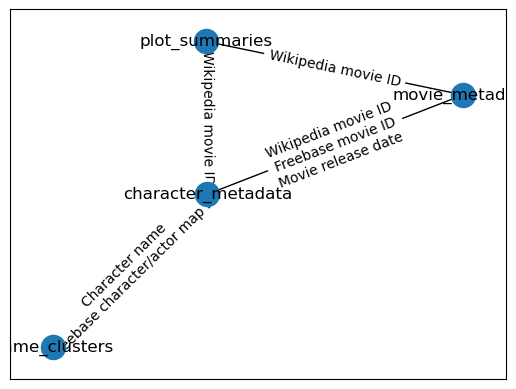

In [14]:
# create a graph with four nodes, each representing a dataframe using networkx to model the dataframe's relationships

G = nx.Graph()

# add the four nodes to the graph (character_metadata, plot_summaries, movie_metadata, name_clusters)
nodes = ["character_metadata", "plot_summaries", "movie_metadata", "name_clusters"]

G.add_nodes_from(nodes)

# add edges to the graph to represent the relationships between the dataframes

G.add_edges_from([("character_metadata", "plot_summaries"), ("character_metadata", "movie_metadata"), ("character_metadata", "name_clusters"),
                  ("plot_summaries", "movie_metadata")])

# add labels to the edges

G.edges["character_metadata", "plot_summaries"]['label'] = "Wikipedia movie ID"
G.edges["character_metadata", "movie_metadata"]['label'] = "Wikipedia movie ID\nFreebase movie ID\nMovie release date"
G.edges["character_metadata", "name_clusters"]['label'] = "Character name\nFreebase character/actor map ID"
G.edges["plot_summaries", "movie_metadata"]['label'] = "Wikipedia movie ID" 

# plot the graph with edge labels

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
edge_labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
plt.show()

#### character_metadata -> movie_metadata

In [15]:
# check if each value of the column Wikipedia movie ID of character_metadata appears in the column Wikipedia movie ID of movie_metadata

character_metadata['Wikipedia movie ID'].isin(movie_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True    450669
Name: count, dtype: int64

In [16]:
# check if each value of the column Freebase movie ID of character_metadata appears in the column Freebase movie ID of movie_metadata

character_metadata['Freebase movie ID'].isin(movie_metadata['Freebase movie ID']).value_counts()

Freebase movie ID
True    450669
Name: count, dtype: int64

In [17]:
# check if each value of the column Movie release date of character_metadata appears in the column Movie release date of movie_metadata

character_metadata['Movie release date'].isin(movie_metadata['Movie release date']).value_counts()

Movie release date
True    450669
Name: count, dtype: int64

#### movie_metadata -> character_metadata

In [18]:
# check if each value of the column Wikipedia movie ID of movie_metadata appears in the column Wikipedia movie ID of character_metadata

movie_metadata['Wikipedia movie ID'].isin(character_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     64330
False    17411
Name: count, dtype: int64

In [19]:
# check if each value of the column Freebase movie ID of movie_metadata appears in the column Freebase movie ID of character_metadata

movie_metadata['Freebase movie ID'].isin(character_metadata['Freebase movie ID']).value_counts()

Freebase movie ID
True     64330
False    17411
Name: count, dtype: int64

In [20]:
# check if each value of the column Movie release date of movie_metadata appears in the column Movie release date of character_metadata

movie_metadata['Movie release date'].isin(character_metadata['Movie release date']).value_counts()

Movie release date
True     79613
False     2128
Name: count, dtype: int64

#### character_metadata -> name_cluster

In [21]:
# check if each value of the column Character name of character_metadata appears in the column Character name of name_clusters

character_metadata['Character name'].isin(name_clusters['Character name']).value_counts()

Character name
False    446369
True       4300
Name: count, dtype: int64

In [22]:
# check if each value of the column Freebase character/actor map ID of character_metadata appears in the column Freebase character/actor map ID of name_clusters

character_metadata['Freebase character/actor map ID'].isin(name_clusters['Freebase character/actor map ID']).value_counts()

Freebase character/actor map ID
False    448008
True       2661
Name: count, dtype: int64

#### name_cluster -> character_metadata

In [23]:
# check if each value of the column Character name of name_clusters appears in the column Character name of character_metadata

name_clusters['Character name'].isin(character_metadata['Character name']).value_counts()

Character name
True    2666
Name: count, dtype: int64

In [24]:
# check if each value of the column Freebase character/actor map ID of name_clusters appears in the column Freebase character/actor map ID of character_metadata

name_clusters['Freebase character/actor map ID'].isin(character_metadata['Freebase character/actor map ID']).value_counts()

Freebase character/actor map ID
True    2666
Name: count, dtype: int64

#### character_metadata -> plot_summaries

In [25]:
# check if each value of the column Wikipedia movie ID of character_metadata appears in the column Wikipedia movie ID of plot_summaries

character_metadata['Wikipedia movie ID'].isin(plot_summaries['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     308485
False    142184
Name: count, dtype: int64

#### plot_summaries -> character_metadata

In [26]:
# check if each value of the column Wikipedia movie ID of plot_summaries appears in the column Wikipedia movie ID of character_metadata

plot_summaries['Wikipedia movie ID'].isin(character_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     37779
False     4524
Name: count, dtype: int64

#### movie_metadata -> plot_summaries

In [27]:
# check if each value of the column Wikipedia movie ID of movie_metadata appears in the column Wikipedia movie ID of plot_summaries

movie_metadata['Wikipedia movie ID'].isin(plot_summaries['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     42204
False    39537
Name: count, dtype: int64

#### plot_summaries -> movie_metadata

In [28]:
# check if each value of the column Wikipedia movie ID of plot_summaries appears in the column Wikipedia movie ID of movie_metadata

plot_summaries['Wikipedia movie ID'].isin(movie_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     42204
False       99
Name: count, dtype: int64

## Distribution

In [29]:
# Distribution of the number of film produced by each country

#a = movie_metadata.groupby(['Movie countries']).size()

# Convert the 'country_data' column to a new DataFrame
#country_list = pd.DataFrame(movie_metadata['Movie countries'].tolist(), index=movie_metadata.index)
#country_list.rename(columns={country_list.columns[0]: 'Movie countries'})
# Concatenate the new DataFrame with the original DataFrame
#result_df = pd.concat([movie_metadata, country_list], axis=1)
# Drop the original 'country_data' column if needed
#result_df = result_df.drop('Movie countries', axis=1)
#result_df.groupby(['Movie countries']).size()

#

# IMDb dataset

### Load data

In [30]:
# Name basics
names_basics = pd.read_table("../data/IMDb/name.basics.tsv")

# Title akas
title_akas = pd.read_table("../data/IMDb/title.akas.tsv")

# Title basics
title_basics = pd.read_table("../data/IMDb/title.basics.tsv")

# Title crew
title_crew = pd.read_table("../data/IMDb/title.crew.tsv")

# Title episode
title_episode = pd.read_table("../data/IMDb/title.episode.tsv")

# Title principals
title_principals = pd.read_table("../data/IMDb/title.principals.tsv")

# Average ratings
title_ratings = pd.read_table("../data/IMDb/title.ratings.tsv")



/var/folders/g9/m8h3jr8d7dldf2nch79wndhh0000gn/T/ipykernel_24850/606883569.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  title_akas = pd.read_table("../data/IMDb/title.akas.tsv")
/var/folders/g9/m8h3jr8d7dldf2nch79wndhh0000gn/T/ipykernel_24850/606883569.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  title_basics = pd.read_table("../data/IMDb/title.basics.tsv")


In [31]:
names_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0045537,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0075213,tt0037382,tt0038355,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0050976"


In [32]:
title_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [33]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [34]:
title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [35]:
title_episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [36]:
title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [37]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2006
1,tt0000002,5.8,269
2,tt0000003,6.5,1909
3,tt0000004,5.5,178
4,tt0000005,6.2,2689


### Merge two tables

In [73]:
# We only keep the tables with title basic information and title ratings

title = pd.merge(title_basics, title_ratings, on='tconst', how='outer')

print(len(title_basics), len(title_ratings), len(title))

# Probleme avec ce merge --> check pour faire ça bien

10302992 1367491 10302992


In [39]:
title.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2006.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,269.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1909.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.5,178.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2689.0


In [40]:
# Display all the types

title.titleType.unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [41]:
# Check the poourcentage of null values in each column

title_null = pd.DataFrame(title.isnull().sum(), columns=['Number of null values'])
title_null['Percentage of null values'] = title_null['Number of null values'] / len(title)

display(title_null)

,Number of null values,Percentage of null values
tconst,0,0.000000
titleType,0,0.000000
primaryTitle,17,0.000002
originalTitle,17,0.000002
isAdult,0,0.000000
startYear,0,0.000000
endYear,0,0.000000
runtimeMinutes,0,0.000000
genres,18,0.000002
averageRating,8935501,0.867272


In [56]:
# Keep only movies

movies_IMDb = title[title["titleType"] == 'movie'].copy()

# Pourquoi il reste des titre avec d'autre types à la fin ?

In [57]:
movies_IMDb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.3,207.0
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.3,484.0
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.1,15.0
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,855.0
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.0,21.0


In [58]:
movies_IMDb["titleType"].unique()

array(['movie'], dtype=object)

In [70]:
# Check the poourcentage of null values in each column

movies_IMDb_null = pd.DataFrame(movies_IMDb.isnull().sum(), columns=['Number of null values'])
movies_IMDb_null['Percentage of null values'] = movies_IMDb_null['Number of null values'] / len(title)

display(movies_IMDb_null)

,Number of null values,Percentage of null values
tconst,0,0.000000e+00
titleType,0,0.000000e+00
primaryTitle,0,0.000000e+00
originalTitle,0,0.000000e+00
isAdult,1,9.705918e-08
startYear,1381032,1.340418e-01
endYear,10188427,9.888804e-01
runtimeMinutes,7199082,6.987370e-01
genres,460142,4.466101e-02
averageRating,8935484,8.672708e-01


In [72]:
# Check that we haven't lost any movie
len(movies_IMDb) == len(title[title["titleType"] == 'movie'])

False

In [61]:
# Replace \N values by NaN

movies_IMDb = title.replace('\\N', np.nan)
movies_IMDb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short",5.7,2006.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short",5.8,269.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance",6.5,1909.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short",5.5,178.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short",6.2,2689.0


In [62]:
# What years are covered by the dataset

oldest_movie_year = movies_IMDb["startYear"].dropna().min()
last_movie_year = movies_IMDb["startYear"].dropna().max()

print(oldest_movie_year, last_movie_year)


1874 2031


In [63]:
# Check if values of the column primaryTitle of movies_IMDb appears in the column primaryTitle of movie_metadata
print(movie_metadata['Movie name'].isin(movies_IMDb["primaryTitle"]).value_counts(), "\n")

# print percentage of movies in movie_metadata that are in movies_IMDb
print("Percentage of movies in movie_metadata that are in movies_IMDb: ", 100 * movie_metadata['Movie name'].isin(movies_IMDb["primaryTitle"]).value_counts()[True] / len(movie_metadata))

Movie name
True     66439
False    15302
Name: count, dtype: int64 

Percentage of movies in movie_metadata that are in movies_IMDb:  81.27989625769197


In [64]:
# Check how many values in the column Movie name of movie_metadata appear multiple times

print(movie_metadata["Movie name"].value_counts().value_counts())

count
1     71091
2      3281
3       720
4       223
5        88
6        30
7        11
8        10
9         8
10        6
11        4
13        2
12        2
17        1
16        1
Name: count, dtype: int64


In [65]:
# Check how many values in the column primaryTitle of movies_IMDb appear multiple times
print(movies_IMDb["primaryTitle"].value_counts().value_counts())

count
1       4218207
2        199775
3         63012
4         31997
5         18911
         ...   
1225          1
1229          1
1231          1
1235          1
723           1
Name: count, Length: 1263, dtype: int64


In [66]:
# Missing title in movies_IMDb
movies_IMDb[movies_IMDb["primaryTitle"].isnull()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
625910,tt0648118,tvEpisode,NaN,NaN,0,1987,NaN,NaN,"Crime,Drama,Mystery",NaN,NaN
1253803,tt10516578,video,NaN,NaN,0,2017,NaN,NaN,"Music,Short",NaN,NaN
3433197,tt14510930,tvEpisode,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4076875,tt15700278,tvEpisode,NaN,NaN,0,2021,NaN,NaN,Talk-Show,NaN,NaN
4558757,tt17042812,movie,NaN,NaN,0,2010,NaN,87,Thriller,NaN,NaN
5066975,tt1971246,tvEpisode,NaN,NaN,0,2011,NaN,NaN,Biography,NaN,NaN
5262841,tt2067043,tvEpisode,NaN,NaN,0,1965,NaN,NaN,Music,NaN,NaN
5601753,tt21883066,tvEpisode,NaN,NaN,0,2022,NaN,NaN,"News,Talk-Show",NaN,NaN
5871605,tt2305914,tvEpisode,NaN,NaN,0,NaN,NaN,NaN,"Comedy,Talk-Show",NaN,NaN
5871614,tt2305918,tvEpisode,NaN,NaN,0,NaN,NaN,NaN,"Comedy,Talk-Show",NaN,NaN


In [67]:
# Missing title in movie_metadata
movie_metadata[movie_metadata["Movie name"].isnull()]

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie revenue,Movie runtime,Movie languages,Movie countries,Movie genres


In [68]:
# Remove rows with missing titles
movies_IMDb = movies_IMDb[movies_IMDb["primaryTitle"].notnull()]
movies_IMDb[movies_IMDb["primaryTitle"].isnull()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes


In [69]:
# Check if there are movies with the same primaryTitle and start year in movies_IMDb
movies_IMDb[movies_IMDb.duplicated(subset=["primaryTitle", "startYear"], keep=False)].sort_values(by=["primaryTitle", "startYear"])

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
6042751,tt2399574,short,#,#,0,2012,NaN,15,"Comedy,Short",3.1,11.0
8854359,tt6748908,short,#,#,0,2012,NaN,8,"Animation,Short",5.7,7.0
8576930,tt6130238,movie,#,#Declimax,0,NaN,NaN,85,Drama,NaN,NaN
9958056,tt9172970,tvEpisode,#,#,0,NaN,NaN,NaN,Romance,NaN,NaN
4275382,tt1611790,video,#1,#1,0,2010,NaN,12,"Comedy,Drama,News",6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
3897786,tt15372970,tvEpisode,Þáttur 5,Þáttur 5,0,2021,NaN,NaN,Reality-TV,NaN,NaN
2659324,tt13086834,tvEpisode,Þáttur 6,Þáttur 6,0,2020,NaN,NaN,Comedy,NaN,NaN
3897725,tt15372864,tvEpisode,Þáttur 6,Þáttur 6,0,2020,NaN,NaN,Reality-TV,NaN,NaN
3897759,tt15372920,tvEpisode,Þáttur 6,Þáttur 6,0,2021,NaN,NaN,Reality-TV,NaN,NaN
